# Дисциплина «Основы машинного обучения»

# Рабочая тетрадь № 3

## Теоретический материал – Эволюционные методы

Деревья решений являются одним из наиболее эффективных Эволюционные методы
Эволюционные методы относятся к числу эффективных средств решения задач оптимизации и структурного синтеза проектных решений. Они основаны на использовании принципов оптимального приспособления организмов в живой природе к условиям окружающей среды. К числу эволюционных относятся методы генетические, колонии муравьев, поведения толпы. Наиболее развиты и востребованы в настоящее время генетические алгоритмы. По мере развития техники и технологий растет доля сложных задач проектирования и управления, для решения которых применение традиционных методов проблематично. Поэтому все большее внимание уделяется применению методов искусственного интеллекта. Генетические алгоритмы Для применения ГА необходимо:
1.	выделить совокупность свойств объекта, характеризуемых внутренними параметрами и влияющих на его полезность, т.е. выделить множество управляемых параметровX=(x_1,x_2,…,x_n) среди x_i могут быть величины различных типов (real, integer, Boolean, enumeration). Наличие нечисловых величин (enumeration) обусловливает возможность решения задач не только параметрической, но и структурной оптимизации;
2.	сформулировать количественную оценку полезности вариантов объекта — функцию полезности F. Если в исходном виде задача многокритериальна, то такая формулировка означает выбор скалярного (обобщенного) критерия;
3.	представить вектор X в форме хромосомы — записи следующего вида:
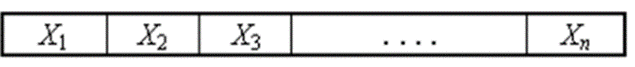
 
Этапы генетического алгоритма могут быть представлены в следующем виде:
for (k=0; k<G; k++)
{ for (j=0; j<N; j++)
  { Выбор родительской пары хромосом;
    Кроссовер;
    Мутации;
    Оценка функции полезности F потомков;
    Селекция;
  }
  Замена текущего поколения новым;
}


## 1.1.1 Пример

# Задача:

Пусть дана начальная популяция из четырех хромосом с двумя генами x и y. Показатель качества хромосомы оценивается функцией Z. При равном качестве хромосом предпочтение отдается хромосоме с большим номером. На каждом этапе хромосома a с высшим качеством порождает четыре новых хромосомы b1,c1,b2,c2, обмениваясь генами с двумя хромосомами b и c более низкого качества по указанной схеме:
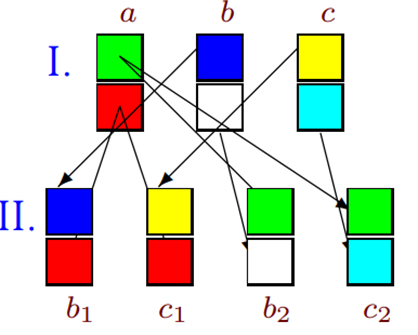
Последняя хромоcома (с низшим качеством) выбывает из популяции. Найти максимальный показатель качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции.

Потребуется несколько функций для реализации алгоритма. Напишем их.

## Решение:

Начнем с функции оценки качества хромосомы qZ(x,y):


In [1]:
def qZ(x,y):
    return (x-3*y+1)/(3*x**2+3*y**2+1)

Далее, оценим суммарное качество хромосом:

In [2]:
def qSumZ(Z):
    return sum(Z)

И запрограммируем представленную выше схему обмена хромосомами:

In [3]:
def exchangeScheme(oldX,oldY,sortedId):
    X=[0 for i in range(4)]
    Y=[0 for i in range(4)]
    X[2]=oldX[sortedId[2]]
    X[3]=oldX[sortedId[2]]
    X[0]=oldX[sortedId[0]]
    X[1]=oldX[sortedId[1]]
    Y[0]=oldY[sortedId[2]]
    Y[1]=oldY[sortedId[2]]
    Y[2]=oldY[sortedId[0]]
    Y[3]=oldY[sortedId[1]]
    return X,Y

Отсортируем массив качества наших потомков и выделим полученные индексы:

In [4]:
def sorting(Z):
    sortedId=sorted(range(len(Z)),key=lambda k:Z[k])
    return sortedId

Напишем функцию для шага эволюции:

In [5]:
def evoStep(X,Y,Z):
    _,minId=min((value,id)for(id,value)in enumerate(Z))
    X=X[:]
    Y=Y[:]
    Z=Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X,Y,Z

Произведем эволюционные изменения, в соответствии с задачей - 4 шага:

In [6]:
def evoSteps(X,Y,stepsNum=4):
    results=[]
    for i in range(4):
        arrZ=[qZ(x,Y[i])for i,x in enumerate(X)]
        X,Y,Z=evoStep(X,Y,arrZ)
        X,Y=exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qSumZ(arrZ),arrZ])
    return X,Y,results

Теперь, когда мы подготовились к решению задачи, написав все необходимые функции для реализации генетического алгоритма (оценки качества хромосом, сортировки потомков и эволюционных шагов), решим задачу в числах. Пусть даны следующие массивы хромосом X и Y:
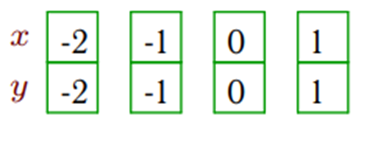
Запишем их в требуемом виде и воспользуемся написанной функцией evoSteps.

In [7]:
X=[-2,-1,0,1]
Y=[-2,-1,0,1]
results=evoSteps(X,Y)

Теперь, выведем полученные значения для показателя качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции. Для этого, воспользуемся циклом по значениям переменной results.

In [8]:
for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')
qualityArrZ=[]
for i in range(len(results[2])):
    qualityArrZ+=results[2][i][3]
print(f'max Z:      {max(qualityArrZ)}')

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z:      1.0


## 	Задание:

Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными.

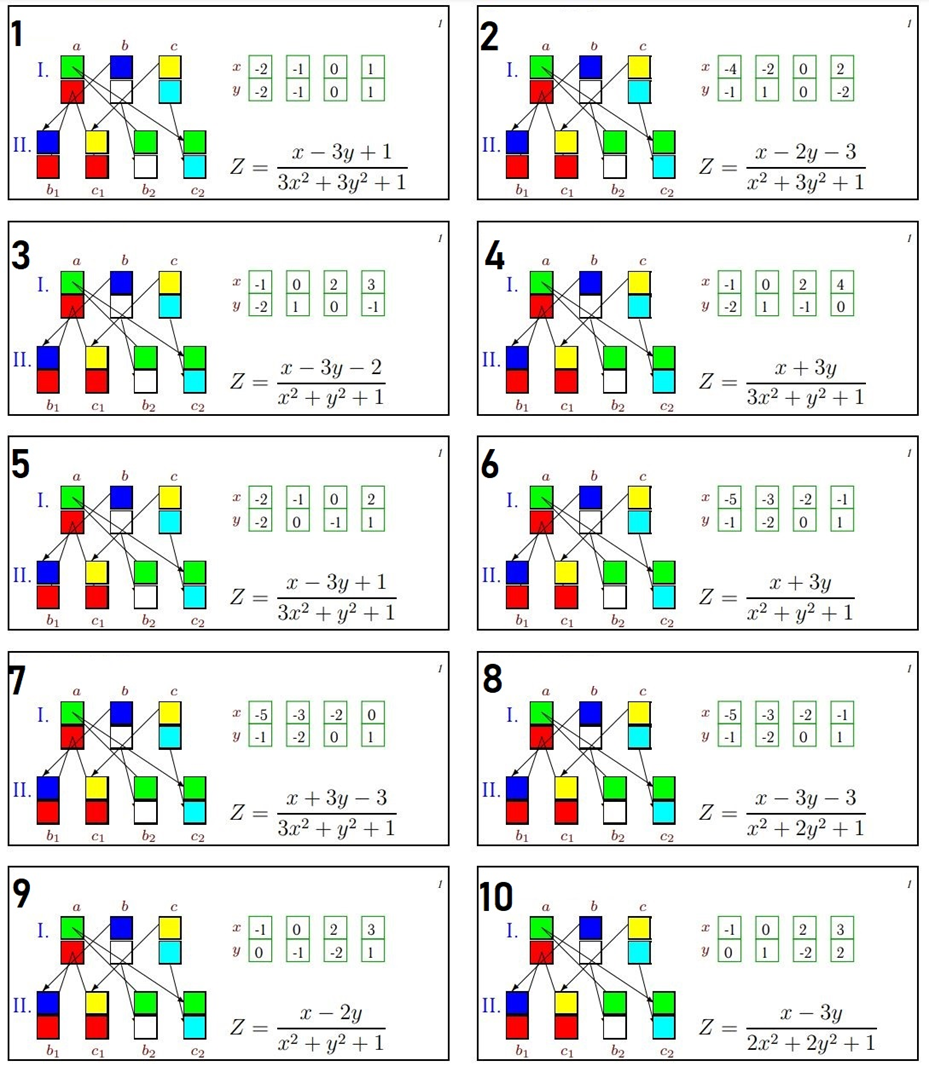

In [9]:
def qZ(x,y): # 1 задача остальные будут аналогичными
    return (x-3*y+1)/(3*x**2+3*y**2+1) # Z - функция качества хромосомы
def qSumZ(Z): # сумма качества хромосом
    return sum(Z)
def exchangeScheme(oldX,oldY,sortedId): # Программируем нашу схему обмена хромосомами
    X=[0 for i in range(4)] # проходим по всем новым хромосомам с геном X 
    Y=[0 for i in range(4)] # проходим по всем новым хромосомам с геном Y 
    X[2]=oldX[sortedId[2]] # Означает что новая хромосома с индексом 2, на самом деле 3x, имеет родителя 1, на картинке a это родитель b2 потомок
    X[3]=oldX[sortedId[2]] # Означает что новая хромосома с индексом 3, на самом деле 4x, имеет родителя 1, на картинке a это родитель с2 потомок
    X[0]=oldX[sortedId[0]] # Означает что новая хромосома с индексом 0, на самом деле 1x, имеет родителя 2, на картинке b это родитель b1 потомок
    X[1]=oldX[sortedId[1]] # Означает что новая хромосома с индексом 1, на самом деле 2x, имеет родителя 3, на картинке c это родитель c1 потомок
    Y[0]=oldY[sortedId[2]] # Означает что новая хромосома с индексом 0, на самом деле 1y, имеет родителя 1, на картинке a это родитель b1 потомок
    Y[1]=oldY[sortedId[2]] # Означает что новая хромосома с индексом 1, на самом деле 2y, имеет родителя 1, на картинке a это родитель c1 потомок
    Y[2]=oldY[sortedId[0]] # Означает что новая хромосома с индексом 2, на самом деле 3y, имеет родителя 2, на картинке b это родитель b2 потомок
    Y[3]=oldY[sortedId[1]] # Означает что новая хромосома с индексом 3, на самом деле 4y, имеет родителя 3, на картинке c это родитель c2 потомок
    return X,Y
def sorting(Z): # Отсортируем массив качества наших потомков и выделим полученные индексы
    sortedId=sorted(range(len(Z)),key=lambda k:Z[k]) # лямбда-функция, которая принимает индекс в качестве входных данных и возвращает значение kZ[k]
    return sortedId
def evoStep(X,Y,Z):
    _,minId=min((value,id)for(id,value)in enumerate(Z)) # enumerate нужен в качестве счетчика элементов последовательности
    X=X[:]
    Y=Y[:]
    Z=Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X,Y,Z
def evoSteps(X,Y,stepsNum=4):
    results=[]
    for i in range(4):
        arrZ=[qZ(x,Y[i])for i,x in enumerate(X)] # qZ будет рассматривать каждый элемент из X
        X,Y,Z=evoStep(X,Y,arrZ)
        X,Y=exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qSumZ(arrZ),arrZ]) # получили все возможные варианты
    return X,Y,results
X=[-2,-1,0,1]
Y=[-2,-1,0,1]
results=evoSteps(X,Y)
for i in range(len(results[2])): # показатель качества хромосомы 
    print(f'max_{i+1}_step: {results[2][i][2]}')
qualityArrZ=[]
for i in range(len(results[2])):
    qualityArrZ+=results[2][i][3]
print(f'max Z:      {max(qualityArrZ)}')

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z:      1.0


In [10]:
def qZ(x,y): # 2
    return (x-2*y-3)/(x**2+3*y**2+1)
def qSumZ(Z):
    return sum(Z)
def exchangeScheme(oldX,oldY,sortedId):
    X=[0 for i in range(4)]
    Y=[0 for i in range(4)] 
    X[2]=oldX[sortedId[2]]
    X[3]=oldX[sortedId[2]]
    X[0]=oldX[sortedId[0]]
    X[1]=oldX[sortedId[1]]
    Y[0]=oldY[sortedId[2]]
    Y[1]=oldY[sortedId[2]]
    Y[2]=oldY[sortedId[0]]
    Y[3]=oldY[sortedId[1]] 
    return X,Y
def sorting(Z): 
    sortedId=sorted(range(len(Z)),key=lambda k:Z[k]) 
    return sortedId
def evoStep(X,Y,Z):
    _,minId=min((value,id)for(id,value)in enumerate(Z)) 
    X=X[:]
    Y=Y[:]
    Z=Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X,Y,Z
def evoSteps(X,Y,stepsNum=4):
    results=[]
    for i in range(4):
        arrZ=[qZ(x,Y[i])for i,x in enumerate(X)]
        X,Y,Z=evoStep(X,Y,arrZ)
        X,Y=exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qSumZ(arrZ),arrZ])
    return X,Y,results
X=[-4,-2,0,2]
Y=[-1,1,0,-2]
results=evoSteps(X,Y)
for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')
qualityArrZ=[]
for i in range(len(results[2])):
    qualityArrZ+=results[2][i][3]
print(f'max Z:      {max(qualityArrZ)}')

max_1_step: -3.948529411764706
max_2_step: -0.41227180527383367
max_3_step: -0.2720588235294117
max_4_step: 0.37449290060851925
max Z:      0.17647058823529413


In [11]:
def qZ(x,y): # 3
    return (x-3*y-2)/(x**2+y**2+1)
def qSumZ(Z):
    return sum(Z)
def exchangeScheme(oldX,oldY,sortedId):
    X=[0 for i in range(4)]
    Y=[0 for i in range(4)] 
    X[2]=oldX[sortedId[2]]
    X[3]=oldX[sortedId[2]]
    X[0]=oldX[sortedId[0]]
    X[1]=oldX[sortedId[1]]
    Y[0]=oldY[sortedId[2]]
    Y[1]=oldY[sortedId[2]]
    Y[2]=oldY[sortedId[0]]
    Y[3]=oldY[sortedId[1]] 
    return X,Y
def sorting(Z): 
    sortedId=sorted(range(len(Z)),key=lambda k:Z[k]) 
    return sortedId
def evoStep(X,Y,Z):
    _,minId=min((value,id)for(id,value)in enumerate(Z)) 
    X=X[:]
    Y=Y[:]
    Z=Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X,Y,Z
def evoSteps(X,Y,stepsNum=4):
    results=[]
    for i in range(4):
        arrZ=[qZ(x,Y[i])for i,x in enumerate(X)]
        X,Y,Z=evoStep(X,Y,arrZ)
        X,Y=exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qSumZ(arrZ),arrZ])
    return X,Y,results
X=[-1,0,2,3]
Y=[-2,1,0,-1]
results=evoSteps(X,Y)
for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')
qualityArrZ=[]
for i in range(len(results[2])):
    qualityArrZ+=results[2][i][3]
print(f'max Z:      {max(qualityArrZ)}')

max_1_step: -1.6363636363636362
max_2_step: -0.3333333333333335
max_3_step: 2.1666666666666665
max_4_step: 2.333333333333333
max Z:      0.6666666666666666


In [12]:
def qZ(x,y): # 4
    return (x+3*y)/(3*x**2+y**2+1)
def qSumZ(Z):
    return sum(Z)
def exchangeScheme(oldX,oldY,sortedId):
    X=[0 for i in range(4)]
    Y=[0 for i in range(4)] 
    X[2]=oldX[sortedId[2]]
    X[3]=oldX[sortedId[2]]
    X[0]=oldX[sortedId[0]]
    X[1]=oldX[sortedId[1]]
    Y[0]=oldY[sortedId[2]]
    Y[1]=oldY[sortedId[2]]
    Y[2]=oldY[sortedId[0]]
    Y[3]=oldY[sortedId[1]] 
    return X,Y
def sorting(Z): 
    sortedId=sorted(range(len(Z)),key=lambda k:Z[k]) 
    return sortedId
def evoStep(X,Y,Z):
    _,minId=min((value,id)for(id,value)in enumerate(Z)) 
    X=X[:]
    Y=Y[:]
    Z=Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X,Y,Z
def evoSteps(X,Y,stepsNum=4):
    results=[]
    for i in range(4):
        arrZ=[qZ(x,Y[i])for i,x in enumerate(X)]
        X,Y,Z=evoStep(X,Y,arrZ)
        X,Y=exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qSumZ(arrZ),arrZ])
    return X,Y,results
X=[-1,0,2,4]
Y=[-2,1,-1,0]
results=evoSteps(X,Y)
for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')
qualityArrZ=[]
for i in range(len(results[2])):
    qualityArrZ+=results[2][i][3]
print(f'max Z:      {max(qualityArrZ)}')

max_1_step: 0.6352040816326531
max_2_step: -1.002857142857143
max_3_step: 2.150989010989011
max_4_step: 2.2142857142857144
max Z:      1.5


In [13]:
def qZ(x,y): # 5
    return (x-3*y+1)/(3*x**2+y**2+1)
def qSumZ(Z):
    return sum(Z)
def exchangeScheme(oldX,oldY,sortedId):
    X=[0 for i in range(4)]
    Y=[0 for i in range(4)] 
    X[2]=oldX[sortedId[2]]
    X[3]=oldX[sortedId[2]]
    X[0]=oldX[sortedId[0]]
    X[1]=oldX[sortedId[1]]
    Y[0]=oldY[sortedId[2]]
    Y[1]=oldY[sortedId[2]]
    Y[2]=oldY[sortedId[0]]
    Y[3]=oldY[sortedId[1]] 
    return X,Y
def sorting(Z): 
    sortedId=sorted(range(len(Z)),key=lambda k:Z[k]) 
    return sortedId
def evoStep(X,Y,Z):
    _,minId=min((value,id)for(id,value)in enumerate(Z)) 
    X=X[:]
    Y=Y[:]
    Z=Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X,Y,Z
def evoSteps(X,Y,stepsNum=4):
    results=[]
    for i in range(4):
        arrZ=[qZ(x,Y[i])for i,x in enumerate(X)]
        X,Y,Z=evoStep(X,Y,arrZ)
        X,Y=exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qSumZ(arrZ),arrZ])
    return X,Y,results
X=[-2,-1,0,2]
Y=[-2,0,-1,1]
results=evoSteps(X,Y)
for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')
qualityArrZ=[]
for i in range(len(results[2])):
    qualityArrZ+=results[2][i][3]
print(f'max Z:      {max(qualityArrZ)}')

max_1_step: 2.2941176470588234
max_2_step: 0.9714285714285713
max_3_step: 4.823529411764706
max_4_step: 5.828571428571428
max Z:      2.0


In [14]:
def qZ(x,y): # 6
    return (x+3*y)/(x**2+y**2+1)
def qSumZ(Z):
    return sum(Z)
def exchangeScheme(oldX,oldY,sortedId):
    X=[0 for i in range(4)]
    Y=[0 for i in range(4)] 
    X[2]=oldX[sortedId[2]]
    X[3]=oldX[sortedId[2]]
    X[0]=oldX[sortedId[0]]
    X[1]=oldX[sortedId[1]]
    Y[0]=oldY[sortedId[2]]
    Y[1]=oldY[sortedId[2]]
    Y[2]=oldY[sortedId[0]]
    Y[3]=oldY[sortedId[1]] 
    return X,Y
def sorting(Z): 
    sortedId=sorted(range(len(Z)),key=lambda k:Z[k]) 
    return sortedId
def evoStep(X,Y,Z):
    _,minId=min((value,id)for(id,value)in enumerate(Z)) 
    X=X[:]
    Y=Y[:]
    Z=Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X,Y,Z
def evoSteps(X,Y,stepsNum=4):
    results=[]
    for i in range(4):
        arrZ=[qZ(x,Y[i])for i,x in enumerate(X)]
        X,Y,Z=evoStep(X,Y,arrZ)
        X,Y=exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qSumZ(arrZ),arrZ])
    return X,Y,results
X=[-5,-3,-2,-1]
Y=[-1,-2,0,1]
results=evoSteps(X,Y)
for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')
qualityArrZ=[]
for i in range(len(results[2])):
    qualityArrZ+=results[2][i][3]
print(f'max Z:      {max(qualityArrZ)}')

max_1_step: -0.6724867724867726
max_2_step: -1.7407407407407407
max_3_step: 0.35925925925925917
max_4_step: 1.4259259259259258
max Z:      0.6666666666666666


In [15]:
def qZ(x,y): # 7
    return (x+3*y-3)/(3*x**2+y**2+1)
def qSumZ(Z):
    return sum(Z)
def exchangeScheme(oldX,oldY,sortedId):
    X=[0 for i in range(4)]
    Y=[0 for i in range(4)] 
    X[2]=oldX[sortedId[2]]
    X[3]=oldX[sortedId[2]]
    X[0]=oldX[sortedId[0]]
    X[1]=oldX[sortedId[1]]
    Y[0]=oldY[sortedId[2]]
    Y[1]=oldY[sortedId[2]]
    Y[2]=oldY[sortedId[0]]
    Y[3]=oldY[sortedId[1]] 
    return X,Y
def sorting(Z): 
    sortedId=sorted(range(len(Z)),key=lambda k:Z[k]) 
    return sortedId
def evoStep(X,Y,Z):
    _,minId=min((value,id)for(id,value)in enumerate(Z)) 
    X=X[:]
    Y=Y[:]
    Z=Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X,Y,Z
def evoSteps(X,Y,stepsNum=4):
    results=[]
    for i in range(4):
        arrZ=[qZ(x,Y[i])for i,x in enumerate(X)]
        X,Y,Z=evoStep(X,Y,arrZ)
        X,Y=exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qSumZ(arrZ),arrZ])
    return X,Y,results
X=[-5,-3,-2,0]
Y=[-1,-2,0,1]
results=evoSteps(X,Y)
for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')
qualityArrZ=[]
for i in range(len(results[2])):
    qualityArrZ+=results[2][i][3]
print(f'max Z:      {max(qualityArrZ)}')

max_1_step: -0.9024725274725274
max_2_step: -4.968383340797134
max_3_step: -0.34338334079713384
max_4_step: -0.1683833407971339
max Z:      0.0


In [16]:
def qZ(x,y): # 8
    return (x-3*y-3)/(x**2+2*y**2+1)
def qSumZ(Z):
    return sum(Z)
def exchangeScheme(oldX,oldY,sortedId):
    X=[0 for i in range(4)]
    Y=[0 for i in range(4)] 
    X[2]=oldX[sortedId[2]]
    X[3]=oldX[sortedId[2]]
    X[0]=oldX[sortedId[0]]
    X[1]=oldX[sortedId[1]]
    Y[0]=oldY[sortedId[2]]
    Y[1]=oldY[sortedId[2]]
    Y[2]=oldY[sortedId[0]]
    Y[3]=oldY[sortedId[1]] 
    return X,Y
def sorting(Z): 
    sortedId=sorted(range(len(Z)),key=lambda k:Z[k]) 
    return sortedId
def evoStep(X,Y,Z):
    _,minId=min((value,id)for(id,value)in enumerate(Z)) 
    X=X[:]
    Y=Y[:]
    Z=Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X,Y,Z
def evoSteps(X,Y,stepsNum=4):
    results=[]
    for i in range(4):
        arrZ=[qZ(x,Y[i])for i,x in enumerate(X)]
        X,Y,Z=evoStep(X,Y,arrZ)
        X,Y=exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qSumZ(arrZ),arrZ])
    return X,Y,results
X=[-5,-3,-2,-1]
Y=[-1,-2,0,1]
results=evoSteps(X,Y)
for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')
qualityArrZ=[]
for i in range(len(results[2])):
    qualityArrZ+=results[2][i][3]
print(f'max Z:      {max(qualityArrZ)}')

max_1_step: -2.928571428571429
max_2_step: -0.8319004524886877
max_3_step: -0.2676147382029735
max_4_step: 0.09502262443438915
max Z:      0.07692307692307693


In [17]:
def qZ(x,y): # 9
    return (x-2*y)/(x**2+y**2+1)
def qSumZ(Z):
    return sum(Z)
def exchangeScheme(oldX,oldY,sortedId):
    X=[0 for i in range(4)]
    Y=[0 for i in range(4)] 
    X[2]=oldX[sortedId[2]]
    X[3]=oldX[sortedId[2]]
    X[0]=oldX[sortedId[0]]
    X[1]=oldX[sortedId[1]]
    Y[0]=oldY[sortedId[2]]
    Y[1]=oldY[sortedId[2]]
    Y[2]=oldY[sortedId[0]]
    Y[3]=oldY[sortedId[1]] 
    return X,Y
def sorting(Z): 
    sortedId=sorted(range(len(Z)),key=lambda k:Z[k]) 
    return sortedId
def evoStep(X,Y,Z):
    _,minId=min((value,id)for(id,value)in enumerate(Z)) 
    X=X[:]
    Y=Y[:]
    Z=Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X,Y,Z
def evoSteps(X,Y,stepsNum=4):
    results=[]
    for i in range(4):
        arrZ=[qZ(x,Y[i])for i,x in enumerate(X)]
        X,Y,Z=evoStep(X,Y,arrZ)
        X,Y=exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qSumZ(arrZ),arrZ])
    return X,Y,results
X=[-1,0,2,3]
Y=[0,-1,-2,1]
results=evoSteps(X,Y)
for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')
qualityArrZ=[]
for i in range(len(results[2])):
    qualityArrZ+=results[2][i][3]
print(f'max Z:      {max(qualityArrZ)}')

max_1_step: 1.2575757575757573
max_2_step: 0.9212121212121211
max_3_step: 3.1666666666666665
max_4_step: 3.466666666666667
max Z:      1.0


In [18]:
def qZ(x,y): # 10
    return (x-3*y)/(2*x**2+2*y**2+1)
def qSumZ(Z):
    return sum(Z)
def exchangeScheme(oldX,oldY,sortedId):
    X=[0 for i in range(4)]
    Y=[0 for i in range(4)] 
    X[2]=oldX[sortedId[2]]
    X[3]=oldX[sortedId[2]]
    X[0]=oldX[sortedId[0]]
    X[1]=oldX[sortedId[1]]
    Y[0]=oldY[sortedId[2]]
    Y[1]=oldY[sortedId[2]]
    Y[2]=oldY[sortedId[0]]
    Y[3]=oldY[sortedId[1]] 
    return X,Y
def sorting(Z): 
    sortedId=sorted(range(len(Z)),key=lambda k:Z[k]) 
    return sortedId
def evoStep(X,Y,Z):
    _,minId=min((value,id)for(id,value)in enumerate(Z)) 
    X=X[:]
    Y=Y[:]
    Z=Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X,Y,Z
def evoSteps(X,Y,stepsNum=4):
    results=[]
    for i in range(4):
        arrZ=[qZ(x,Y[i])for i,x in enumerate(X)]
        X,Y,Z=evoStep(X,Y,arrZ)
        X,Y=exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qSumZ(arrZ),arrZ])
    return X,Y,results
X=[-1,0,2,3]
Y=[0,1,-2,2]
results=evoSteps(X,Y)
for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')
qualityArrZ=[]
for i in range(len(results[2])):
    qualityArrZ+=results[2][i][3]
print(f'max Z:      {max(qualityArrZ)}')

max_1_step: -0.9738562091503267
max_2_step: 0.7748068924539511
max_3_step: 0.9251336898395722
max_4_step: 1.7290552584670231
max Z:      0.47058823529411764


## 1.2. Теоретический материал – Метод имитации отжига

Алгоритм отжига – это метод оптимизации, который называется отжигом, или симуляцией восстановления (Simulated annealing). Как ясно из названия, метод поиска моделирует процесс восстановления. Восстановление – это физический процесс, который заключается в нагреве и последующем контролируемом охлаждении субстанции. В результате получается прочная кристаллическая структура, которая отличается от структуры с дефектами, образующейся при быстром беспорядочном охлаждении. Структура здесь представляет собой кодированное решение, а температура используется для того, чтобы указать, как и когда будут приниматься новые решения. 
Алгоритм имитации отжига включает следующие этапы:
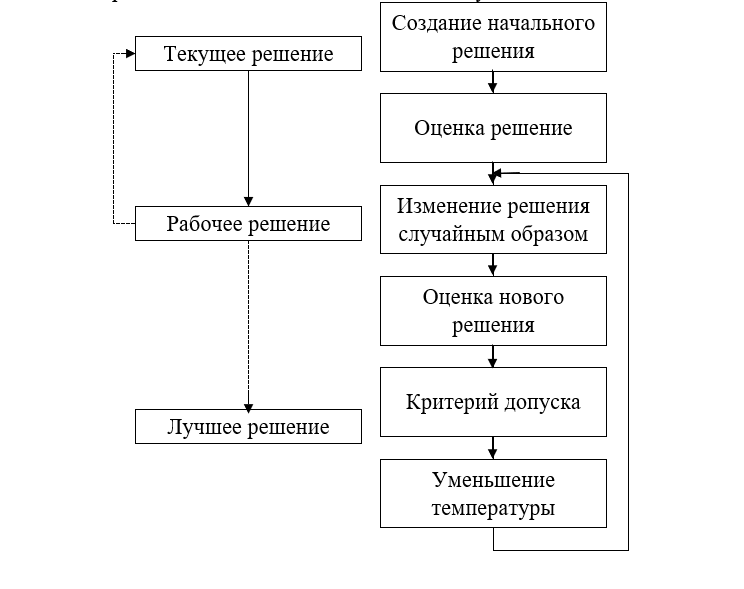
Метод отжига может быть эффективным при решении задач различных классов, требующих оптимизации. Ниже приводится их краткий список:
1.	создание пути;
2.	реконструкция изображения;
3.	назначение задач и планирование;
4.	размещение сети;
5.	глобальная маршрутизация;
6.	обнаружение и распознавание визуальных объектов;
7.	разработка специальных цифровых фильтров.
Поскольку метод отжига представляет собой процесс генерации случайных чисел, поиск решения с использованием данного алгоритма может занять значительное время. В некоторых случаях алгоритм вообще не находит решение или выбирает не самое оптимальное. Алгоритм отжига как способ выполнения процедур поиска и оптимизации. Данный метод является аналогом процесса нагревания тела до состояния плавления с последующим постепенным охлаждением. При высоких температурах поиск ведется по всему диапазону. При снижении температуры диапазон поиска уменьшается до небольшой области вокруг текущего решения.

Рассмотрим решение задачи поиска оптимального маршрута на графе методом имитации отжига Для этого, представим формальную постановку задачи и рассмотрим пример, который иллюстрирует алгоритм решения.
Итак, необходимо Найти длину гамильтонова цикла S4 в полном графе K6  после четырех циклов решения задачи методом отжига. Даны расстояния L(i,j) между вершинами. Даны также: начальная последовательность вершин L0, последовательность замен вершин Z и выпавшие при этом вероятности перехода P(k),k=1,...,4.
Переход на худшее (/\S(k)=S(k)-S(k-1)>0) ) решение допустим, если P(*)=100, где снижение температуры происходит по закону T(k+1)=0.5T(k) от T(1)=100.

## 1.2.1 Пример

## Задача:

Итак, начальные условия задачи представляют собой следующий граф с расстояниями между ребрами:
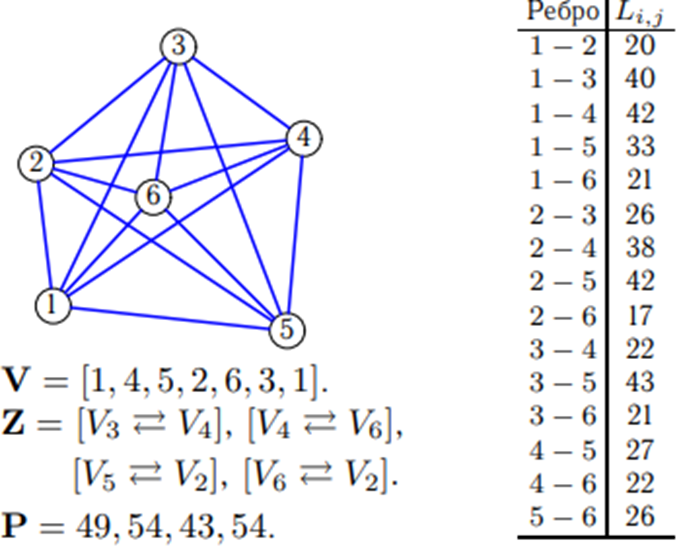

## Решение:

Рассмотрим решение с применением Python.

Импортируем библиотеки:

In [19]:
import networkx as nx
from math import e

Далее, опишем массив длин ребер, последовательности прохождение вершин на маршруте и их замены, значения P, а также начальную температуру:

In [20]:
distances=[(1,2,20),
          (1,3,40),
          (1,4,42),
          (1,5,33),
          (1,6,21),
          (2,3,26),
          (2,4,38),
          (2,5,42),
          (2,6,17),
          (3,4,22),
          (3,5,43),
          (3,6,21),
          (4,5,27),
          (4,6,22),
          (5,6,26)]
V=[1,4,5,2,6,3,1]
Z=[(3,4),
  (4,6),
  (5,2),
  (6,2)]
P=[49,54,43,54]
T=100

Запишем функции вероятности и изменения температуры:

In [21]:
def probability(delta,T):
    return 100*e**(-delta/T)
def reductTemp(prevT):
    nextT=0.5*prevT
    return nextT

Построим граф по заданным вершинам, как в начальном условии:

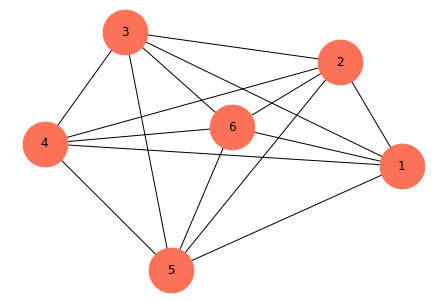

In [22]:
graph=nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph,node_color="#fb7258",node_size=2000,with_labels=True)

Теперь, напишем необходимые, согласно алгоритму выше, функции для работы метода имитации отжига. Вычислим длину ребра:

In [23]:
def edgeLength(i,j,distances,roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0]==i and item[1]==j)or(item[1]==i and item[0]==j)else-1)
                    for item in distances])
    else:
        return max([(item[2]if(item[0]==i and item[1]==j)else-1)for item in ditances])

Вычислим длину маршрута:

In [24]:
def routeLength(V,distances):
    edges=[]
    for i in range(len(V)-1):
        edges.append(edgeLength(V[i],V[i+1],distances))
    return sum(edges)


Запишем функцию для однократной перестановки в пути:

In [25]:
def routeOneReplacement(arrV,Z,replacementByName=True):
    decrement=1 if replacementByName else 0
    arrV[Z[0]-decrement],arrV[Z[1]-decrement]=arrV[Z[1]-decrement],arrV[Z[0]-decrement]
    return arrV

Запишем функцию для однократной перестановки в пути:

In [26]:
def routeReplacement(V,Z):
    for z in Z:
        V=routeOneReplacement(V,z)
    return V

Теперь, опишем алгоритм выбора подходящего пути методом отжига:

In [27]:
def chooseRoute(distances,V,Z,T,P):
    sumLength=routeLength(V,distances)
    arrSum=[sumLength]
    for i in range(len(Z)):
        newV=routeOneReplacement(V[:],Z[i])
        newS=routeLength(newV,distances)
        arrSum.append(newS)
        deltaS=newS-sumLength
        if deltaS>0:
            p=probability(deltaS,T)
            if p>P[i]:
                V=newV
                sumLength=newS
        else:
            V=newV
            sumLength=newS
        T=reductTemp(T)
    return V,arrSum

И нарисуем наш граф, отвечающий заданному маршруту:

In [28]:
def drawRouteGraph(distances,bestRoute):
    newDistances=[]
    for i in range (len(bestRoute)-1):
        for distance in distances:
            if distance[0]==bestRoute[i] and distance[1]==bestRoute[i+1] or distance[1]==bestRoute[i] and distance[0]==bestRoute[i+1]:
                newDistances.append(distance)
    graph=nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph,node_color="#fb7258",node_size=2000,with_labels=True)

И, наконец, рассчитаем наилучший маршрут и его длину:

Лучший выбранный маршрут:[1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута:146
Длины всех рассмотренных маршрутов:[189, 209, 186, 146, 166]


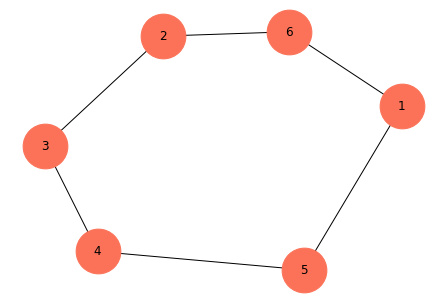

In [29]:
bestRoute,arrLength=chooseRoute(distances,V,Z,T,P)
print(f'Лучший выбранный маршрут:{bestRoute}')
print(f'Длина лучшего выбранного маршрута:{routeLength(bestRoute,distances)}')
print(f'Длины всех рассмотренных маршрутов:{arrLength}')
drawRouteGraph(distances,bestRoute)

## Задание:

Найти длину гамильтонова цикла S4 в полном графе K6 после четырех циклов решения задачи методом отжига по вариантам ниже.
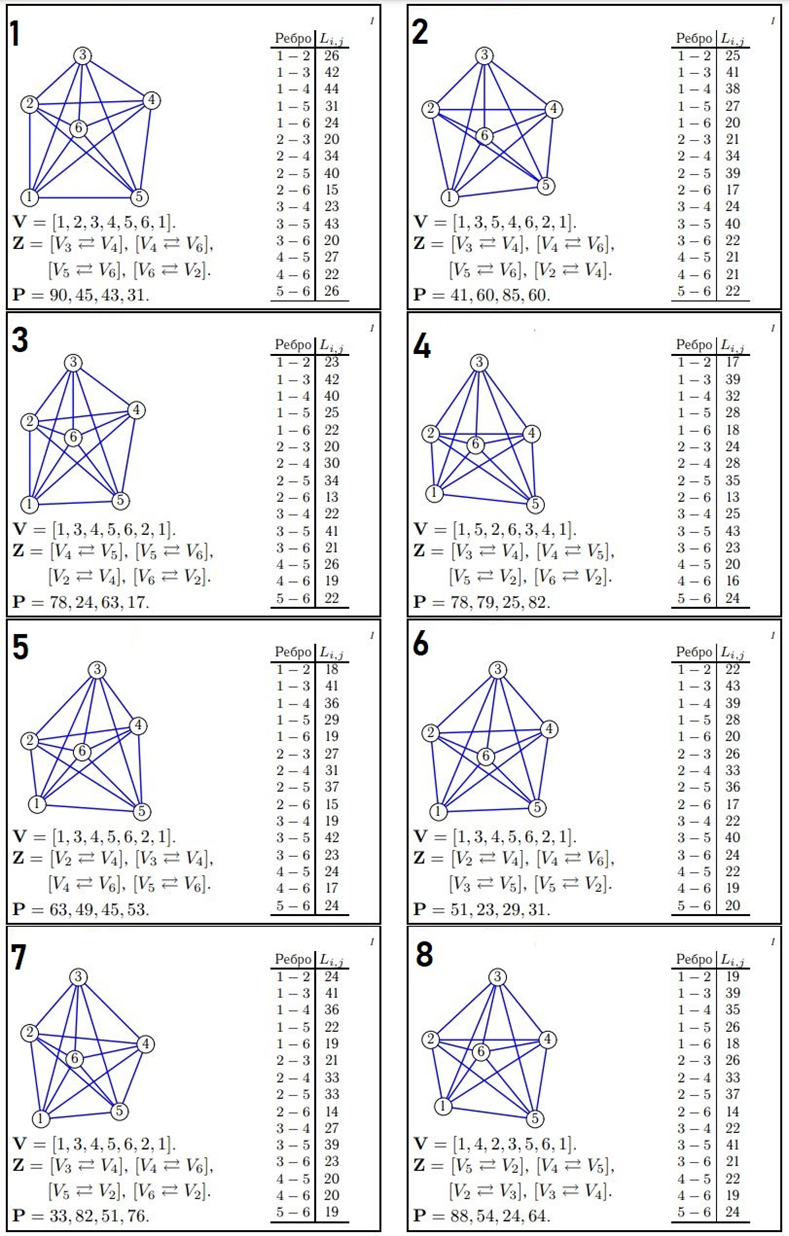

Лучший выбранный маршрут:[1, 2, 3, 6, 4, 5, 1]
Длина лучшего выбранного маршрута:146
Длины всех рассмотренных маршрутов:[146, 176, 163, 146, 176]


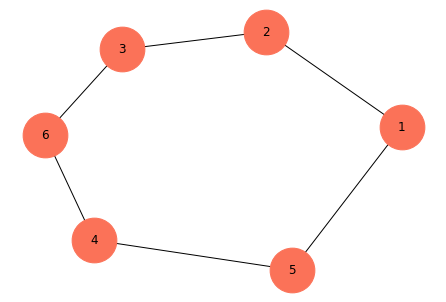

In [30]:
distances=[(1,2,26), # 1 distance это расстояние между ребрами
          (1,3,42),
          (1,4,44),
          (1,5,31),
          (1,6,24),
          (2,3,20),
          (2,4,34),
          (2,5,40),
          (2,6,15),
          (3,4,23),
          (3,5,43),
          (3,6,20),
          (4,5,27),
          (4,6,22),
          (5,6,26)]
V=[1,2,3,4,5,6,1] # Начальная последовательность прохождения маршрута
Z=[(3,4), # Последовательность замен вершин, тоесть 3 элемент в нашей V мы можем заменить на 4 элемент V
  (4,6),
  (5,6),
  (6,2)]
P=[90,45,43,31] # Выпавшие в процессе счета случайные числа
T=100 # Const
def probability(delta,T):
    return 100*e**(-delta/T) # Проверка случайного числа, если это число попадет в диапазон от [0;P(*)], тогда мы принимает наше значение как наилучшее
def reductTemp(prevT):
    nextT=0.5*prevT # Проверка снижения температуры
    return nextT
def edgeLength(i,j,distances,roundTrip=True): # Длинна ребра
    if roundTrip:
        return max([(item[2] if (item[0]==i and item[1]==j)or(item[1]==i and item[0]==j)else-1)
                    for item in distances])
    else:
        return max([(item[2]if(item[0]==i and item[1]==j)else-1)for item in ditances])
def routeLength(V,distances): # Определение наилучшего пути
    edges=[]
    for i in range(len(V)-1):
        edges.append(edgeLength(V[i],V[i+1],distances))
    return sum(edges)
def routeOneReplacement(arrV,Z,replacementByName=True): # Если мы находим маршур с наименьшей длинной и температурой, то мы записываем его как наилучший
    decrement=1 if replacementByName else 0
    arrV[Z[0]-decrement],arrV[Z[1]-decrement]=arrV[Z[1]-decrement],arrV[Z[0]-decrement]
    return arrV
def routeReplacement(V,Z): # Здесь происходит сама замена, чтобы показать полный результат а не заменять все возможные варианты
    for z in Z:
        V=routeOneReplacement(V,z)
    return V
def chooseRoute(distances,V,Z,T,P): # происходит реализация функций выше для дальнейшего выбора
    sumLength=routeLength(V,distances)
    arrSum=[sumLength]
    for i in range(len(Z)):
        newV=routeOneReplacement(V[:],Z[i])
        newS=routeLength(newV,distances)
        arrSum.append(newS)
        deltaS=newS-sumLength
        if deltaS>0:
            p=probability(deltaS,T)
            if p>P[i]:
                V=newV
                sumLength=newS
        else:
            V=newV
            sumLength=newS
        T=reductTemp(T)
    return V,arrSum
def drawRouteGraph(distances,bestRoute): # подбирается лучшая дистанция и выводится ответ
    newDistances=[]
    for i in range (len(bestRoute)-1):
        for distance in distances:
            if distance[0]==bestRoute[i] and distance[1]==bestRoute[i+1] or distance[1]==bestRoute[i] and distance[0]==bestRoute[i+1]:
                newDistances.append(distance)
    graph=nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph,node_color="#fb7258",node_size=2000,with_labels=True)
bestRoute,arrLength=chooseRoute(distances,V,Z,T,P)
print(f'Лучший выбранный маршрут:{bestRoute}')
print(f'Длина лучшего выбранного маршрута:{routeLength(bestRoute,distances)}')
print(f'Длины всех рассмотренных маршрутов:{arrLength}')
drawRouteGraph(distances,bestRoute)

Лучший выбранный маршрут:[1, 2, 4, 3, 6, 5, 1]
Длина лучшего выбранного маршрута:154
Длины всех рассмотренных маршрутов:[165, 150, 165, 180, 154]


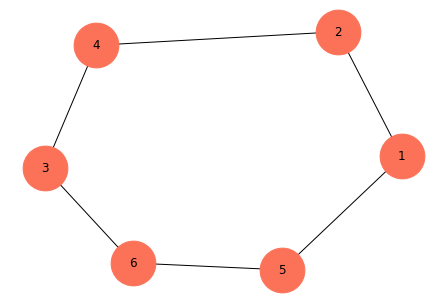

In [31]:
distances=[(1,2,25), # 2
          (1,3,41),
          (1,4,38),
          (1,5,27),
          (1,6,20),
          (2,3,21),
          (2,4,34),
          (2,5,39),
          (2,6,17),
          (3,4,24),
          (3,5,40),
          (3,6,22),
          (4,5,21),
          (4,6,21),
          (5,6,22)]
V=[1,3,5,4,6,2,1]
Z=[(3,4),
  (4,6),
  (5,6),
  (2,4)]
P=[41,60,85,60]
T=100
def probability(delta,T):
    return 100*e**(-delta/T)
def reductTemp(prevT):
    nextT=0.5*prevT
    return nextT
def edgeLength(i,j,distances,roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0]==i and item[1]==j)or(item[1]==i and item[0]==j)else-1)
                    for item in distances])
    else:
        return max([(item[2]if(item[0]==i and item[1]==j)else-1)for item in ditances])
def routeLength(V,distances):
    edges=[]
    for i in range(len(V)-1):
        edges.append(edgeLength(V[i],V[i+1],distances))
    return sum(edges)
def routeOneReplacement(arrV,Z,replacementByName=True):
    decrement=1 if replacementByName else 0
    arrV[Z[0]-decrement],arrV[Z[1]-decrement]=arrV[Z[1]-decrement],arrV[Z[0]-decrement]
    return arrV
def routeReplacement(V,Z):
    for z in Z:
        V=routeOneReplacement(V,z)
    return V
def chooseRoute(distances,V,Z,T,P):
    sumLength=routeLength(V,distances)
    arrSum=[sumLength]
    for i in range(len(Z)):
        newV=routeOneReplacement(V[:],Z[i])
        newS=routeLength(newV,distances)
        arrSum.append(newS)
        deltaS=newS-sumLength
        if deltaS>0:
            p=probability(deltaS,T)
            if p>P[i]:
                V=newV
                sumLength=newS
        else:
            V=newV
            sumLength=newS
        T=reductTemp(T)
    return V,arrSum
def drawRouteGraph(distances,bestRoute):
    newDistances=[]
    for i in range (len(bestRoute)-1):
        for distance in distances:
            if distance[0]==bestRoute[i] and distance[1]==bestRoute[i+1] or distance[1]==bestRoute[i] and distance[0]==bestRoute[i+1]:
                newDistances.append(distance)
    graph=nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph,node_color="#fb7258",node_size=2000,with_labels=True)
bestRoute,arrLength=chooseRoute(distances,V,Z,T,P)
print(f'Лучший выбранный маршрут:{bestRoute}')
print(f'Длина лучшего выбранного маршрута:{routeLength(bestRoute,distances)}')
print(f'Длины всех рассмотренных маршрутов:{arrLength}')
drawRouteGraph(distances,bestRoute)

Лучший выбранный маршрут:[1, 5, 4, 3, 2, 6, 1]
Длина лучшего выбранного маршрута:128
Длины всех рассмотренных маршрутов:[148, 162, 155, 142, 128]


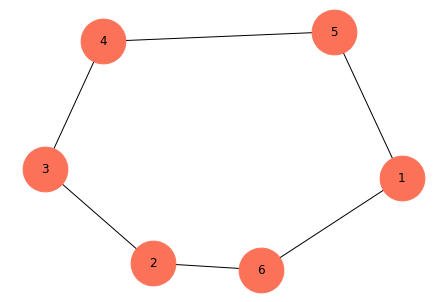

In [32]:
distances=[(1,2,23), # 3
          (1,3,42),
          (1,4,40),
          (1,5,25),
          (1,6,22),
          (2,3,20),
          (2,4,30),
          (2,5,34),
          (2,6,13),
          (3,4,22),
          (3,5,41),
          (3,6,21),
          (4,5,26),
          (4,6,19),
          (5,6,22)]
V=[1,3,4,5,6,2,1]
Z=[(4,5),
  (5,6),
  (2,4),
  (6,2)]
P=[78,24,63,17]
T=100
def probability(delta,T):
    return 100*e**(-delta/T)
def reductTemp(prevT):
    nextT=0.5*prevT
    return nextT
def edgeLength(i,j,distances,roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0]==i and item[1]==j)or(item[1]==i and item[0]==j)else-1)
                    for item in distances])
    else:
        return max([(item[2]if(item[0]==i and item[1]==j)else-1)for item in ditances])
def routeLength(V,distances):
    edges=[]
    for i in range(len(V)-1):
        edges.append(edgeLength(V[i],V[i+1],distances))
    return sum(edges)
def routeOneReplacement(arrV,Z,replacementByName=True):
    decrement=1 if replacementByName else 0
    arrV[Z[0]-decrement],arrV[Z[1]-decrement]=arrV[Z[1]-decrement],arrV[Z[0]-decrement]
    return arrV
def routeReplacement(V,Z):
    for z in Z:
        V=routeOneReplacement(V,z)
    return V
def chooseRoute(distances,V,Z,T,P):
    sumLength=routeLength(V,distances)
    arrSum=[sumLength]
    for i in range(len(Z)):
        newV=routeOneReplacement(V[:],Z[i])
        newS=routeLength(newV,distances)
        arrSum.append(newS)
        deltaS=newS-sumLength
        if deltaS>0:
            p=probability(deltaS,T)
            if p>P[i]:
                V=newV
                sumLength=newS
        else:
            V=newV
            sumLength=newS
        T=reductTemp(T)
    return V,arrSum
def drawRouteGraph(distances,bestRoute):
    newDistances=[]
    for i in range (len(bestRoute)-1):
        for distance in distances:
            if distance[0]==bestRoute[i] and distance[1]==bestRoute[i+1] or distance[1]==bestRoute[i] and distance[0]==bestRoute[i+1]:
                newDistances.append(distance)
    graph=nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph,node_color="#fb7258",node_size=2000,with_labels=True)
bestRoute,arrLength=chooseRoute(distances,V,Z,T,P)
print(f'Лучший выбранный маршрут:{bestRoute}')
print(f'Длина лучшего выбранного маршрута:{routeLength(bestRoute,distances)}')
print(f'Длины всех рассмотренных маршрутов:{arrLength}')
drawRouteGraph(distances,bestRoute)

Лучший выбранный маршрут:[1, 3, 6, 2, 5, 4, 1]
Длина лучшего выбранного маршрута:162
Длины всех рассмотренных маршрутов:[156, 146, 159, 162, 178]


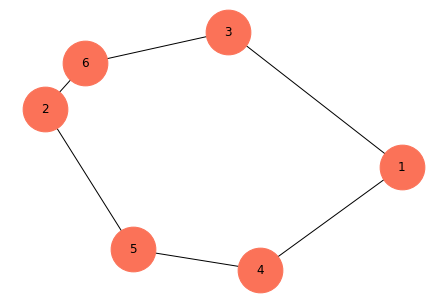

In [33]:
distances=[(1,2,17), # 4
          (1,3,39),
          (1,4,32),
          (1,5,28),
          (1,6,18),
          (2,3,24),
          (2,4,28),
          (2,5,35),
          (2,6,13),
          (3,4,25),
          (3,5,43),
          (3,6,23),
          (4,5,20),
          (4,6,16),
          (5,6,24)]
V=[1,5,2,6,3,4,1]
Z=[(3,4),
  (4,5),
  (5,2),
  (6,2)]
P=[78,79,25,82]
T=100
def probability(delta,T):
    return 100*e**(-delta/T)
def reductTemp(prevT):
    nextT=0.5*prevT
    return nextT
def edgeLength(i,j,distances,roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0]==i and item[1]==j)or(item[1]==i and item[0]==j)else-1)
                    for item in distances])
    else:
        return max([(item[2]if(item[0]==i and item[1]==j)else-1)for item in ditances])
def routeLength(V,distances):
    edges=[]
    for i in range(len(V)-1):
        edges.append(edgeLength(V[i],V[i+1],distances))
    return sum(edges)
def routeOneReplacement(arrV,Z,replacementByName=True):
    decrement=1 if replacementByName else 0
    arrV[Z[0]-decrement],arrV[Z[1]-decrement]=arrV[Z[1]-decrement],arrV[Z[0]-decrement]
    return arrV
def routeReplacement(V,Z):
    for z in Z:
        V=routeOneReplacement(V,z)
    return V
def chooseRoute(distances,V,Z,T,P):
    sumLength=routeLength(V,distances)
    arrSum=[sumLength]
    for i in range(len(Z)):
        newV=routeOneReplacement(V[:],Z[i])
        newS=routeLength(newV,distances)
        arrSum.append(newS)
        deltaS=newS-sumLength
        if deltaS>0:
            p=probability(deltaS,T)
            if p>P[i]:
                V=newV
                sumLength=newS
        else:
            V=newV
            sumLength=newS
        T=reductTemp(T)
    return V,arrSum
def drawRouteGraph(distances,bestRoute):
    newDistances=[]
    for i in range (len(bestRoute)-1):
        for distance in distances:
            if distance[0]==bestRoute[i] and distance[1]==bestRoute[i+1] or distance[1]==bestRoute[i] and distance[0]==bestRoute[i+1]:
                newDistances.append(distance)
    graph=nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph,node_color="#fb7258",node_size=2000,with_labels=True)
bestRoute,arrLength=chooseRoute(distances,V,Z,T,P)
print(f'Лучший выбранный маршрут:{bestRoute}')
print(f'Длина лучшего выбранного маршрута:{routeLength(bestRoute,distances)}')
print(f'Длины всех рассмотренных маршрутов:{arrLength}')
drawRouteGraph(distances,bestRoute)

Лучший выбранный маршрут:[1, 5, 3, 4, 6, 2, 1]
Длина лучшего выбранного маршрута:140
Длины всех рассмотренных маршрутов:[141, 128, 140, 166, 155]


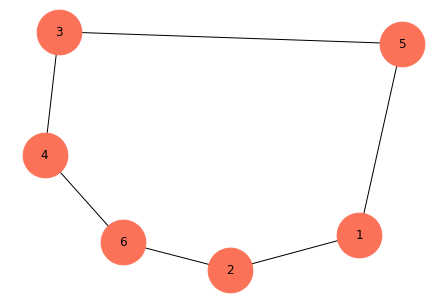

In [34]:
distances=[(1,2,18), # 5
          (1,3,41),
          (1,4,36),
          (1,5,29),
          (1,6,19),
          (2,3,27),
          (2,4,31),
          (2,5,37),
          (2,6,15),
          (3,4,19),
          (3,5,42),
          (3,6,23),
          (4,5,24),
          (4,6,17),
          (5,6,24)]
V=[1,3,4,5,6,2,1]
Z=[(2,4),
  (3,4),
  (4,6),
  (5,6)]
P=[63,49,45,53]
T=100
def probability(delta,T):
    return 100*e**(-delta/T)
def reductTemp(prevT):
    nextT=0.5*prevT
    return nextT
def edgeLength(i,j,distances,roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0]==i and item[1]==j)or(item[1]==i and item[0]==j)else-1)
                    for item in distances])
    else:
        return max([(item[2]if(item[0]==i and item[1]==j)else-1)for item in ditances])
def routeLength(V,distances):
    edges=[]
    for i in range(len(V)-1):
        edges.append(edgeLength(V[i],V[i+1],distances))
    return sum(edges)
def routeOneReplacement(arrV,Z,replacementByName=True):
    decrement=1 if replacementByName else 0
    arrV[Z[0]-decrement],arrV[Z[1]-decrement]=arrV[Z[1]-decrement],arrV[Z[0]-decrement]
    return arrV
def routeReplacement(V,Z):
    for z in Z:
        V=routeOneReplacement(V,z)
    return V
def chooseRoute(distances,V,Z,T,P):
    sumLength=routeLength(V,distances)
    arrSum=[sumLength]
    for i in range(len(Z)):
        newV=routeOneReplacement(V[:],Z[i])
        newS=routeLength(newV,distances)
        arrSum.append(newS)
        deltaS=newS-sumLength
        if deltaS>0:
            p=probability(deltaS,T)
            if p>P[i]:
                V=newV
                sumLength=newS
        else:
            V=newV
            sumLength=newS
        T=reductTemp(T)
    return V,arrSum
def drawRouteGraph(distances,bestRoute):
    newDistances=[]
    for i in range (len(bestRoute)-1):
        for distance in distances:
            if distance[0]==bestRoute[i] and distance[1]==bestRoute[i+1] or distance[1]==bestRoute[i] and distance[0]==bestRoute[i+1]:
                newDistances.append(distance)
    graph=nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph,node_color="#fb7258",node_size=2000,with_labels=True)
bestRoute,arrLength=chooseRoute(distances,V,Z,T,P)
print(f'Лучший выбранный маршрут:{bestRoute}')
print(f'Длина лучшего выбранного маршрута:{routeLength(bestRoute,distances)}')
print(f'Длины всех рассмотренных маршрутов:{arrLength}')
drawRouteGraph(distances,bestRoute)

Лучший выбранный маршрут:[1, 5, 6, 2, 4, 3, 1]
Длина лучшего выбранного маршрута:163
Длины всех рассмотренных маршрутов:[146, 135, 167, 163, 194]


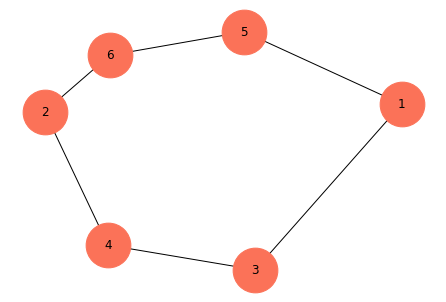

In [35]:
distances=[(1,2,22), # 6
          (1,3,43),
          (1,4,39),
          (1,5,28),
          (1,6,20),
          (2,3,26),
          (2,4,33),
          (2,5,36),
          (2,6,17),
          (3,4,22),
          (3,5,40),
          (3,6,24),
          (4,5,22),
          (4,6,19),
          (5,6,20)]
V=[1,3,4,5,6,2,1]
Z=[(2,4),
  (4,6),
  (3,5),
  (5,2)]
P=[51,23,29,31]
T=100
def probability(delta,T):
    return 100*e**(-delta/T)
def reductTemp(prevT):
    nextT=0.5*prevT
    return nextT
def edgeLength(i,j,distances,roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0]==i and item[1]==j)or(item[1]==i and item[0]==j)else-1)
                    for item in distances])
    else:
        return max([(item[2]if(item[0]==i and item[1]==j)else-1)for item in ditances])
def routeLength(V,distances):
    edges=[]
    for i in range(len(V)-1):
        edges.append(edgeLength(V[i],V[i+1],distances))
    return sum(edges)
def routeOneReplacement(arrV,Z,replacementByName=True):
    decrement=1 if replacementByName else 0
    arrV[Z[0]-decrement],arrV[Z[1]-decrement]=arrV[Z[1]-decrement],arrV[Z[0]-decrement]
    return arrV
def routeReplacement(V,Z):
    for z in Z:
        V=routeOneReplacement(V,z)
    return V
def chooseRoute(distances,V,Z,T,P):
    sumLength=routeLength(V,distances)
    arrSum=[sumLength]
    for i in range(len(Z)):
        newV=routeOneReplacement(V[:],Z[i])
        newS=routeLength(newV,distances)
        arrSum.append(newS)
        deltaS=newS-sumLength
        if deltaS>0:
            p=probability(deltaS,T)
            if p>P[i]:
                V=newV
                sumLength=newS
        else:
            V=newV
            sumLength=newS
        T=reductTemp(T)
    return V,arrSum
def drawRouteGraph(distances,bestRoute):
    newDistances=[]
    for i in range (len(bestRoute)-1):
        for distance in distances:
            if distance[0]==bestRoute[i] and distance[1]==bestRoute[i+1] or distance[1]==bestRoute[i] and distance[0]==bestRoute[i+1]:
                newDistances.append(distance)
    graph=nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph,node_color="#fb7258",node_size=2000,with_labels=True)
bestRoute,arrLength=chooseRoute(distances,V,Z,T,P)
print(f'Лучший выбранный маршрут:{bestRoute}')
print(f'Длина лучшего выбранного маршрута:{routeLength(bestRoute,distances)}')
print(f'Длины всех рассмотренных маршрутов:{arrLength}')
drawRouteGraph(distances,bestRoute)

Лучший выбранный маршрут:[1, 6, 5, 4, 3, 2, 1]
Длина лучшего выбранного маршрута:130
Длины всех рассмотренных маршрутов:[145, 158, 183, 130, 146]


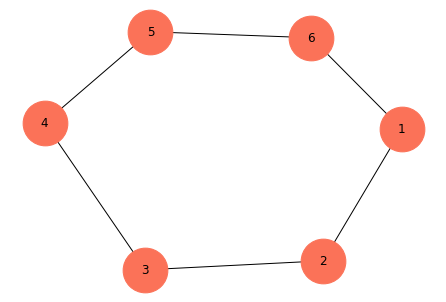

In [36]:
distances=[(1,2,24), # 7
          (1,3,41),
          (1,4,36),
          (1,5,22),
          (1,6,19),
          (2,3,21),
          (2,4,33),
          (2,5,33),
          (2,6,14),
          (3,4,27),
          (3,5,39),
          (3,6,23),
          (4,5,20),
          (4,6,20),
          (5,6,19)]
V=[1,3,4,5,6,2,1]
Z=[(3,4),
  (4,6),
  (5,2),
  (6,2)]
P=[33,82,51,76]
T=100
def probability(delta,T):
    return 100*e**(-delta/T)
def reductTemp(prevT):
    nextT=0.5*prevT
    return nextT
def edgeLength(i,j,distances,roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0]==i and item[1]==j)or(item[1]==i and item[0]==j)else-1)
                    for item in distances])
    else:
        return max([(item[2]if(item[0]==i and item[1]==j)else-1)for item in ditances])
def routeLength(V,distances):
    edges=[]
    for i in range(len(V)-1):
        edges.append(edgeLength(V[i],V[i+1],distances))
    return sum(edges)
def routeOneReplacement(arrV,Z,replacementByName=True):
    decrement=1 if replacementByName else 0
    arrV[Z[0]-decrement],arrV[Z[1]-decrement]=arrV[Z[1]-decrement],arrV[Z[0]-decrement]
    return arrV
def routeReplacement(V,Z):
    for z in Z:
        V=routeOneReplacement(V,z)
    return V
def chooseRoute(distances,V,Z,T,P):
    sumLength=routeLength(V,distances)
    arrSum=[sumLength]
    for i in range(len(Z)):
        newV=routeOneReplacement(V[:],Z[i])
        newS=routeLength(newV,distances)
        arrSum.append(newS)
        deltaS=newS-sumLength
        if deltaS>0:
            p=probability(deltaS,T)
            if p>P[i]:
                V=newV
                sumLength=newS
        else:
            V=newV
            sumLength=newS
        T=reductTemp(T)
    return V,arrSum
def drawRouteGraph(distances,bestRoute):
    newDistances=[]
    for i in range (len(bestRoute)-1):
        for distance in distances:
            if distance[0]==bestRoute[i] and distance[1]==bestRoute[i+1] or distance[1]==bestRoute[i] and distance[0]==bestRoute[i+1]:
                newDistances.append(distance)
    graph=nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph,node_color="#fb7258",node_size=2000,with_labels=True)
bestRoute,arrLength=chooseRoute(distances,V,Z,T,P)
print(f'Лучший выбранный маршрут:{bestRoute}')
print(f'Длина лучшего выбранного маршрута:{routeLength(bestRoute,distances)}')
print(f'Длины всех рассмотренных маршрутов:{arrLength}')
drawRouteGraph(distances,bestRoute)

Лучший выбранный маршрут:[1, 2, 5, 4, 3, 6, 1]
Длина лучшего выбранного маршрута:139
Длины всех рассмотренных маршрутов:[177, 148, 157, 139, 154]


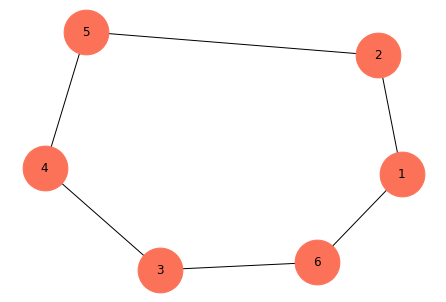

In [37]:
distances=[(1,2,19), # 8
          (1,3,39),
          (1,4,35),
          (1,5,26),
          (1,6,18),
          (2,3,26),
          (2,4,33),
          (2,5,37),
          (2,6,14),
          (3,4,22),
          (3,5,41),
          (3,6,21),
          (4,5,22),
          (4,6,19),
          (5,6,24)]
V=[1,4,2,3,5,6,1]
Z=[(5,2),
  (4,5),
  (2,3),
  (3,4)]
P=[88,54,24,64]
T=100
def probability(delta,T):
    return 100*e**(-delta/T)
def reductTemp(prevT):
    nextT=0.5*prevT
    return nextT
def edgeLength(i,j,distances,roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0]==i and item[1]==j)or(item[1]==i and item[0]==j)else-1)
                    for item in distances])
    else:
        return max([(item[2]if(item[0]==i and item[1]==j)else-1)for item in ditances])
def routeLength(V,distances):
    edges=[]
    for i in range(len(V)-1):
        edges.append(edgeLength(V[i],V[i+1],distances))
    return sum(edges)
def routeOneReplacement(arrV,Z,replacementByName=True):
    decrement=1 if replacementByName else 0
    arrV[Z[0]-decrement],arrV[Z[1]-decrement]=arrV[Z[1]-decrement],arrV[Z[0]-decrement]
    return arrV
def routeReplacement(V,Z):
    for z in Z:
        V=routeOneReplacement(V,z)
    return V
def chooseRoute(distances,V,Z,T,P):
    sumLength=routeLength(V,distances)
    arrSum=[sumLength]
    for i in range(len(Z)):
        newV=routeOneReplacement(V[:],Z[i])
        newS=routeLength(newV,distances)
        arrSum.append(newS)
        deltaS=newS-sumLength
        if deltaS>0:
            p=probability(deltaS,T)
            if p>P[i]:
                V=newV
                sumLength=newS
        else:
            V=newV
            sumLength=newS
        T=reductTemp(T)
    return V,arrSum
def drawRouteGraph(distances,bestRoute):
    newDistances=[]
    for i in range (len(bestRoute)-1):
        for distance in distances:
            if distance[0]==bestRoute[i] and distance[1]==bestRoute[i+1] or distance[1]==bestRoute[i] and distance[0]==bestRoute[i+1]:
                newDistances.append(distance)
    graph=nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph,node_color="#fb7258",node_size=2000,with_labels=True)
bestRoute,arrLength=chooseRoute(distances,V,Z,T,P)
print(f'Лучший выбранный маршрут:{bestRoute}')
print(f'Длина лучшего выбранного маршрута:{routeLength(bestRoute,distances)}')
print(f'Длины всех рассмотренных маршрутов:{arrLength}')
drawRouteGraph(distances,bestRoute)

## Задание*:

На решенном уже примере поэкспериментируйте с показателем S, проанализируйте результаты.

## Решение:
    Если мы увеличим расстояние L(i,j), это же наш 3 столбик в массиве distances, то длина гамильтонова цикла S, увеличится.
    Если не изменять маршрут V, то результат не поменяется, за исключением цифр из которого он должен начинать и заканчивать маршрут.
    Если не изменять последовательность замен Z, сделать её 1|1,2|2,3|3,4|4 то замен не будет, следовательно результат будет один.
    Если сделать последовательность замен Z 1|2,2|3,3|4,4|5, то наш граф будет выглядеть в 1 линию.
    Если сделать последовательность замен Z 1|2,1|3,1|4,1|5, то мы будем делать замену только 1 числа, меняя местами в начале со 2, затем с 3,4 и 5.
    Если выпавшие в процессе счета случайные числа это же P, увеличить в 2,3 раза, то результат не поменяется.
    Если P[0] увеличить в какое-то количество раз, то длина гамильтонова цикла S, увеличится.
    Если P[1] увеличить в какое-то количество раз, то длина гамильтонова цикла S, увеличится.
    Если P[2] увеличить в какое-то количество раз, то длина гамильтонова цикла S, увеличится.
    Если P[3] увеличить в какое-то количество раз, то длина гамильтонова цикла S, не изменится.

Лучший выбранный маршрут:[5, 1, 2, 3, 4, 6, 1]
Длина лучшего выбранного маршрута:130
Длины всех рассмотренных маршрутов:[131, 144, 155, 163, 130]


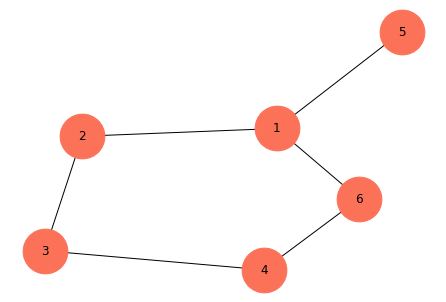

In [80]:
distances=[(1,2,19), # *
          (1,3,39),
          (1,4,35),
          (1,5,26),
          (1,6,18),
          (2,3,26),
          (2,4,33),
          (2,5,37),
          (2,6,14),
          (3,4,22),
          (3,5,41),
          (3,6,21),
          (4,5,22),
          (4,6,19),
          (5,6,24)]
V=[1,2,3,4,5,6,1]
Z=[(1,2),
  (1,3),
  (1,4),
  (1,5)]
P=[1,1,1,1]
T=100
def probability(delta,T):
    return 100*e**(-delta/T)
def reductTemp(prevT):
    nextT=0.5*prevT
    return nextT
def edgeLength(i,j,distances,roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0]==i and item[1]==j)or(item[1]==i and item[0]==j)else-1)
                    for item in distances])
    else:
        return max([(item[2]if(item[0]==i and item[1]==j)else-1)for item in ditances])
def routeLength(V,distances):
    edges=[]
    for i in range(len(V)-1):
        edges.append(edgeLength(V[i],V[i+1],distances))
    return sum(edges)
def routeOneReplacement(arrV,Z,replacementByName=True):
    decrement=1 if replacementByName else 0
    arrV[Z[0]-decrement],arrV[Z[1]-decrement]=arrV[Z[1]-decrement],arrV[Z[0]-decrement]
    return arrV
def routeReplacement(V,Z):
    for z in Z:
        V=routeOneReplacement(V,z)
    return V
def chooseRoute(distances,V,Z,T,P):
    sumLength=routeLength(V,distances)
    arrSum=[sumLength]
    for i in range(len(Z)):
        newV=routeOneReplacement(V[:],Z[i])
        newS=routeLength(newV,distances)
        arrSum.append(newS)
        deltaS=newS-sumLength
        if deltaS>0:
            p=probability(deltaS,T)
            if p>P[i]:
                V=newV
                sumLength=newS
        else:
            V=newV
            sumLength=newS
        T=reductTemp(T)
    return V,arrSum
def drawRouteGraph(distances,bestRoute):
    newDistances=[]
    for i in range (len(bestRoute)-1):
        for distance in distances:
            if distance[0]==bestRoute[i] and distance[1]==bestRoute[i+1] or distance[1]==bestRoute[i] and distance[0]==bestRoute[i+1]:
                newDistances.append(distance)
    graph=nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph,node_color="#fb7258",node_size=2000,with_labels=True)
bestRoute,arrLength=chooseRoute(distances,V,Z,T,P)
print(f'Лучший выбранный маршрут:{bestRoute}')
print(f'Длина лучшего выбранного маршрута:{routeLength(bestRoute,distances)}')
print(f'Длины всех рассмотренных маршрутов:{arrLength}')
drawRouteGraph(distances,bestRoute)